# Start out with 'Serial Input' to understand the process
Use this code as a starting point to pull in serial data once you know how things work.

In [32]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import time
import serial
import serial.tools.list_ports

## Make sure the Arduino is plugged in and available

If the IDE and/or the serial monitor are open, Jupyter may not be able to get access to the serial port. Run the cell to see a list of serial ports, then use the right format in the next cell to open the port you have the arduino plugged into.

In [33]:
# Show a list of existing serial ports so you can decide what to open
ports = list(serial.tools.list_ports.comports())
for p in ports:
    print(p)

/dev/cu.Bluetooth-Incoming-Port - n/a
/dev/cu.usbmodemFD1461 - Generic CDC


In [34]:
# Serial port must not be in use by another application, or complex errors will show up
# Be sure the Arduino serial monitor is closed before you run this cell!
#ser = serial.Serial('/dev/cu.usbmodemFD14131',115200,timeout=1)
#ser = serial.Serial('/dev/cu.usbmodem1A1321',115200,timeout=1)
#ser = serial.Serial('/dev/cu.usbmodem1411',115200,timeout=1)
ser = serial.Serial('/dev/cu.usbmodemFD1461',115200,timeout=1)
#ser = serial.Serial('COM3',115200,timeout=1)

In [35]:
def catchUp():   # get rid of any data lying around the serial buffer
    while ser.in_waiting > 100:  # read just about everything that's there
        ser.reset_input_buffer()   # throwaway everything in the buffer
        ser.readline()
    ser.readline()
    
catchUp()
print("done")

done


[['14828048' ' 711.00' ' 0.76' ' 26.43']
 ['14834904' ' 709.00' ' 0.76' ' 26.22']
 ['14841768' ' 711.00' ' 0.76' ' 26.43']]


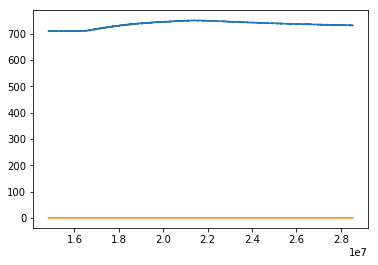

In [45]:
lines = 2000   # the number of lines you want to read from the arduino
a = []        # a[] is just a list for now...

catchUp()

# read in a whole lot of lines from the serial port and append them to a[]
for i in range(0,lines+1):
    #read, then decode into simple ASCII, strip off whitespace and split at commas
    a.append(ser.readline().decode("utf-8").strip().split(','))
    
a = np.asarray(a)                              # convert a[] into an np.array
print(a[:3,:])                                 # print a few lines to be sure it worked  
d = np.asfarray(a[1:,1:])                      # slice to get the data columns as floats
micros = np.asfarray(a[1:,0],dtype=np.uint32)  # and the first column as time in unsigned 32 bit
plt.plot(micros,d[:,0],micros,d[:,1])

In [24]:
print(ser.isOpen())

True


In [25]:
ser.close()

## Write out the data to a file
You need to open the file ('tmpYY-MM-DD-hh-mm-ss.csv' will wind up in the current directory) in order to write on it ('w'), then write a whole series of lines. Putting a time stamp on means you won't overwrite the last data you took by mistake, but may make things difficult to keep track of. Change the file names as soon as practical and delete the ones you don't need.

I googled and found the timestamp code here:

http://www.pythonforbeginners.com/basics/python-datetime-time-examples

In [46]:
import datetime
fn = ('tmp' 
      + datetime.datetime.now().strftime("%y-%m-%d-%H-%M-%S") 
      + '.csv')
f = open(fn,'w')
for i in range(0,lines):
    f.write("%d, " % micros[i])
    for x in d[i]: f.write("%f, " % x)
    f.write("\n")
f.close()
print("Data written to: "+fn)

Data written to: tmp17-03-05-20-44-34.csv
